In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  ƒê·ªåC D·ªÆ LI·ªÜU G·ªêC
df = pd.read_csv("nhatot.csv", dtype=str)
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu g·ªëc: {df.shape}")
print(f"C√°c c·ªôt: {df.columns.tolist()}")

# Hi·ªÉn th·ªã d·ªØ li·ªáu g·ªëc ƒë·ªÉ ki·ªÉm tra
print("\n--- 10 d√≤ng ƒë·∫ßu ti√™n ---")
print(df[["Price", "Area", "Category", "Ward"]].head(10))

K√≠ch th∆∞·ªõc d·ªØ li·ªáu g·ªëc: (5980, 18)
C√°c c·ªôt: ['ID', 'Title', 'Price', 'Area', 'City', 'District', 'Ward', 'Category', 'Rooms', 'Toilets', 'Latitude', 'Longitude', 'Poster_Type', 'Date_Posted', 'Crawl_Date', 'Legal_Status', 'url', 'source']

--- 10 d√≤ng ƒë·∫ßu ti√™n ---
         Price Area                        Category  \
0   7680000000  111                           Nh√† ·ªü   
1      6500000   11                 CƒÉn h·ªô/Chung c∆∞   
2     12000000  117  VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh   
3      6500000  112                 CƒÉn h·ªô/Chung c∆∞   
4   1400000000   57                             ƒê·∫•t   
5   4850000000  119                 CƒÉn h·ªô/Chung c∆∞   
6  10500000000  109                           Nh√† ·ªü   
7  14000000000   11                             ƒê·∫•t   
8   3200000000  119                           Nh√† ·ªü   
9     13000000  102                 CƒÉn h·ªô/Chung c∆∞   

                                       Ward  
0                           

In [3]:
#  L√ÄM S·∫†CH D·ªÆ LI·ªÜU C∆† B·∫¢N

# H√†m l√†m s·∫°ch gi√°
def clean_price(price_str):
    if pd.isna(price_str):
        return None
    price_str = str(price_str).lower().replace(",", ".").strip()
    
    # Lo·∫°i b·ªè gi√° th·ªèa thu·∫≠n
    if "gi√° th·ªèa thu·∫≠n" in price_str or "th∆∞∆°ng l∆∞·ª£ng" in price_str or "li√™n h·ªá" in price_str:
        return None
    
    # Gi√° theo ƒë∆°n v·ªã
    if "t·ª∑" in price_str:
        nums = re.findall(r"[\d\.]+", price_str)
        if nums:
            return float(nums[0]) * 1000000000  # 1 t·ª∑ = 1 t·ª∑ VND
    elif "tri·ªáu" in price_str:
        nums = re.findall(r"[\d\.]+", price_str)
        if nums:
            return float(nums[0]) * 1000000  # 1 tri·ªáu = 1,000,000 VND
    elif "ng√†n" in price_str or "ngh√¨n" in price_str:
        nums = re.findall(r"[\d\.]+", price_str)
        if nums:
            return float(nums[0]) * 1000  # 1 ng√†n = 1,000 VND
    
    # Fallback: t√¨m s·ªë tr·ª±c ti·∫øp
    nums = re.findall(r"[\d\.]+", price_str)
    if nums:
        num = float(nums[0])
        # KI·ªÇM TRA: N·∫øu s·ªë l·ªõn h∆°n 1000, coi nh∆∞ ƒë√£ l√† s·ªë ti·ªÅn ƒë·∫ßy ƒë·ªß
        if num > 1000:
            return num  # Tr·∫£ v·ªÅ nguy√™n gi√° tr·ªã, KH√îNG nh√¢n th√™m
        else:
            # N·∫øu s·ªë nh·ªè, c√≥ th·ªÉ l√† ƒë∆°n v·ªã t·ª∑
            return num * 1000000000  # t·ª∑
    
    return None

# H√†m l√†m s·∫°ch di·ªán t√≠ch
def clean_area(area_str):
    if pd.isna(area_str):
        return None
    area_str = str(area_str).lower().replace(",", ".")
    
    # T√¨m s·ªë (c√≥ th·ªÉ c√≥ d·∫•u ch·∫•m th·∫≠p ph√¢n)
    nums = re.findall(r"[\d\.]+", area_str)
    if nums:
        area = float(nums[0])
        # N·∫øu di·ªán t√≠ch qu√° l·ªõn (> 1000) c√≥ th·ªÉ l√† nh·∫ßm ƒë∆°n v·ªã
        if area > 1000:
            return area / 100  # chia ƒë·ªÉ ƒëi·ªÅu ch·ªânh
        return area
    return None

# %%
# √Åp d·ª•ng l√†m s·∫°ch
df["Price_clean"] = df["Price"].apply(clean_price)
df["Area_clean"] = df["Area"].apply(clean_area)

# Lo·∫°i b·ªè d√≤ng c√≥ gi√° tr·ªã null
initial_count = len(df)
df = df.dropna(subset=["Price_clean", "Area_clean"])
after_clean_count = len(df)

print(f"ƒê√£ lo·∫°i b·ªè {initial_count - after_clean_count} d√≤ng c√≥ gi√°/di·ªán t√≠ch kh√¥ng h·ª£p l·ªá")
print(f"S·ªë d√≤ng c√≤n l·∫°i: {after_clean_count}")

ƒê√£ lo·∫°i b·ªè 0 d√≤ng c√≥ gi√°/di·ªán t√≠ch kh√¥ng h·ª£p l·ªá
S·ªë d√≤ng c√≤n l·∫°i: 5980


In [4]:
# T√≠nh gi√°/m2
df["Price_per_m2"] = df["Price_clean"] / df["Area_clean"]

# Ki·ªÉm tra k·∫øt qu·∫£ l√†m s·∫°ch
print("\n--- K·∫æT QU·∫¢ L√ÄM S·∫†CH ---")
sample_data = df[["Price", "Price_clean", "Area", "Area_clean", "Price_per_m2"]].head(10).copy()
sample_data["Price_clean_formatted"] = sample_data["Price_clean"].apply(lambda x: f"{x:,.0f}" if pd.notna(x) else "NaN")
sample_data["Price_per_m2_formatted"] = sample_data["Price_per_m2"].apply(lambda x: f"{x:,.0f}" if pd.notna(x) else "NaN")
print(sample_data[["Price", "Price_clean_formatted", "Area", "Area_clean", "Price_per_m2_formatted"]])


--- K·∫æT QU·∫¢ L√ÄM S·∫†CH ---
         Price Price_clean_formatted Area  Area_clean Price_per_m2_formatted
0   7680000000         7,680,000,000  111       111.0             69,189,189
1      6500000             6,500,000   11        11.0                590,909
2     12000000            12,000,000  117       117.0                102,564
3      6500000             6,500,000  112       112.0                 58,036
4   1400000000         1,400,000,000   57        57.0             24,561,404
5   4850000000         4,850,000,000  119       119.0             40,756,303
6  10500000000        10,500,000,000  109       109.0             96,330,275
7  14000000000        14,000,000,000   11        11.0          1,272,727,273
8   3200000000         3,200,000,000  119       119.0             26,890,756
9     13000000            13,000,000  102       102.0                127,451


In [5]:
#  X·ª¨ L√ù OUTLIERS

def remove_outliers_multiple(df, columns):
    """
    X·ª≠ l√Ω outliers cho nhi·ªÅu c·ªôt c√πng l√∫c
    """
    if len(df) == 0:
        return df
        
    mask = pd.Series([True] * len(df))
    
    for col in columns:
        if col not in df.columns:
            print(f" C·∫£nh b√°o: C·ªôt '{col}' kh√¥ng t·ªìn t·∫°i")
            continue
            
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # ƒê·∫£m b·∫£o lower kh√¥ng √¢m cho c√°c gi√° tr·ªã kh√¥ng th·ªÉ √¢m
        if col in ['Price_clean', 'Area_clean', 'Price_per_m2']:
            lower = max(lower, 0)
        
        col_mask = (df[col] >= lower) & (df[col] <= upper)
        mask = mask & col_mask
        
        removed_count = len(df) - col_mask.sum()
        print(f"{col}: Gi·ªØ l·∫°i {col_mask.sum():,} / {len(df):,} d√≤ng (Lo·∫°i b·ªè {removed_count:,} outliers)")
    
    result_df = df[mask].copy()
    print(f"\nT·ªïng s·ªë d√≤ng sau x·ª≠ l√Ω outliers: {len(result_df):,}")
    return result_df

# √Åp d·ª•ng x·ª≠ l√Ω outliers
df_clean = remove_outliers_multiple(df, ['Price_clean', 'Area_clean', 'Price_per_m2'])

Price_clean: Gi·ªØ l·∫°i 5,592 / 5,980 d√≤ng (Lo·∫°i b·ªè 388 outliers)
Area_clean: Gi·ªØ l·∫°i 4,999 / 5,980 d√≤ng (Lo·∫°i b·ªè 981 outliers)
Price_per_m2: Gi·ªØ l·∫°i 5,369 / 5,980 d√≤ng (Lo·∫°i b·ªè 611 outliers)

T·ªïng s·ªë d√≤ng sau x·ª≠ l√Ω outliers: 4,650


In [6]:
#  X·ª¨ L√ù C√ÅC BI·∫æN PH√ÇN LO·∫†I

# T√°ch ƒë·ªãa ch·ªâ n·∫øu c√≥ c·ªôt Location
if 'Location' in df_clean.columns:
    location_split = df_clean['Location'].str.split(',', n=2, expand=True)
    if location_split.shape[1] >= 3:
        df_clean['Street'] = location_split[0].str.strip()
        df_clean['District'] = location_split[1].str.strip()
        df_clean['Province'] = location_split[2].str.strip()
        print("ƒê√£ t√°ch c·ªôt Location th√†nh Street, District, Province")
    else:
        print(" C·ªôt Location kh√¥ng c√≥ ƒë·ªß th√¥ng tin ƒë·ªÉ t√°ch")

# Th·ªëng k√™ bi·∫øn ph√¢n lo·∫°i
categorical_cols = ['Category', 'Legal_Status']
for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n--- Ph√¢n ph·ªëi {col} ---")
        print(df_clean[col].value_counts().head(10))


--- Ph√¢n ph·ªëi Category ---
Category
Nh√† ·ªü                             2207
CƒÉn h·ªô/Chung c∆∞                    905
Ph√≤ng tr·ªç                          593
ƒê·∫•t                                478
VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh     467
Name: count, dtype: int64

--- Ph√¢n ph·ªëi Legal_Status ---
Legal_Status
S·ªï h·ªìng ri√™ng    4650
Name: count, dtype: int64


In [7]:
#  TR√çCH XU·∫§T T·ª™ KH√ìA T·ª™ TI√äU ƒê·ªÄ

if 'Title' in df_clean.columns:
    # L√†m s·∫°ch title
    df_clean['Title'] = df_clean['Title'].fillna('')
    df_clean['Title_Length'] = df_clean['Title'].str.len()
    
    # Tr√≠ch xu·∫•t t·ª´ kh√≥a quan tr·ªçng
    important_keywords = ['ch√≠nh ch·ªß', 'gi√° r·∫ª', 'view ƒë·∫πp', 'm·∫∑t ti·ªÅn', 's·ªï ƒë·ªè', 's·ªï h·ªìng']
    for keyword in important_keywords:
        df_clean[f'Keyword_{keyword.replace(" ", "_")}'] = df_clean['Title'].str.contains(keyword, case=False, na=False).astype(int)
    
    print("ƒê√£ tr√≠ch xu·∫•t c√°c t·ª´ kh√≥a quan tr·ªçng t·ª´ ti√™u ƒë·ªÅ")

ƒê√£ tr√≠ch xu·∫•t c√°c t·ª´ kh√≥a quan tr·ªçng t·ª´ ti√™u ƒë·ªÅ


In [8]:
#  TH·ªêNG K√ä M√î T·∫¢ HO√ÄN CH·ªàNH

def format_currency(x):
    """ƒê·ªãnh d·∫°ng ti·ªÅn t·ªá d·ªÖ ƒë·ªçc"""
    if pd.isna(x):
        return "NaN"
    if x >= 1e9:  # T·ª∑ ƒë·ªìng
        return f"{x/1e9:,.1f} t·ª∑"
    elif x >= 1e6:  # Tri·ªáu ƒë·ªìng
        return f"{x/1e6:,.0f} tri·ªáu"
    elif x >= 1e3:  # Ng√†n ƒë·ªìng
        return f"{x/1e3:,.0f} ngh√¨n"
    else:
        return f"{x:,.0f} VND"

def format_area(x):
    """ƒê·ªãnh d·∫°ng di·ªán t√≠ch"""
    if pd.isna(x):
        return "NaN"
    return f"{x:,.0f} m¬≤"

# Th·ªëng k√™ cho bi·∫øn ƒë·ªãnh l∆∞·ª£ng
numeric_cols = ['Price_clean', 'Area_clean', 'Price_per_m2']
print("Th·ªëng k√™ bi·∫øn ƒë·ªãnh l∆∞·ª£ng")

for col in numeric_cols:
    if col in df_clean.columns:
        print(f"\n--- {col} ---")
        stats = df_clean[col].describe()
        
        if col == 'Price_clean':
            formatter = format_currency
        elif col == 'Area_clean':
            formatter = format_area
        else:  # Price_per_m2
            formatter = lambda x: f"{format_currency(x)}/m¬≤" if pd.notna(x) else "NaN"
        
        print(f"S·ªë l∆∞·ª£ng:    {int(stats['count']):,}")
        print(f"Trung b√¨nh:  {formatter(stats['mean'])}")
        print(f"ƒê·ªô l·ªách chu·∫©n: {formatter(stats['std'])}")
        print(f"T·ªëi thi·ªÉu:   {formatter(stats['min'])}")
        print(f"25%:         {formatter(stats['25%'])}")
        print(f"Trung v·ªã:    {formatter(stats['50%'])}")
        print(f"75%:         {formatter(stats['75%'])}")
        print(f"T·ªëi ƒëa:      {formatter(stats['max'])}")

# Th·ªëng k√™ cho bi·∫øn ph√¢n lo·∫°i
print("\nTh·ªëng k√™ bi·∫øn ph√¢n lo·∫°i")

categorical_stats = ['Category', 'Legal_Status', 'District', 'Ward']
for col in categorical_stats:
    if col in df_clean.columns:
        print(f"\n--- Ph√¢n ph·ªëi {col} ---")
        value_counts = df_clean[col].value_counts()
        for i, (value, count) in enumerate(value_counts.head(10).items()):
            percentage = (count / len(df_clean)) * 100
            print(f"{i+1:2d}. {value:<30} {count:>5,} d√≤ng ({percentage:.1f}%)")

Th·ªëng k√™ bi·∫øn ƒë·ªãnh l∆∞·ª£ng

--- Price_clean ---
S·ªë l∆∞·ª£ng:    4,650
Trung b√¨nh:  2.5 t·ª∑
ƒê·ªô l·ªách chu·∫©n: 3.3 t·ª∑
T·ªëi thi·ªÉu:   100 ngh√¨n
25%:         9 tri·ªáu
Trung v·ªã:    100 tri·ªáu
75%:         4.7 t·ª∑
T·ªëi ƒëa:      13.2 t·ª∑

--- Area_clean ---
S·ªë l∆∞·ª£ng:    4,650
Trung b√¨nh:  104 m¬≤
ƒê·ªô l·ªách chu·∫©n: 18 m¬≤
T·ªëi thi·ªÉu:   31 m¬≤
25%:         102 m¬≤
Trung v·ªã:    109 m¬≤
75%:         113 m¬≤
T·ªëi ƒëa:      130 m¬≤

--- Price_per_m2 ---
S·ªë l∆∞·ª£ng:    4,650
Trung b√¨nh:  25 tri·ªáu/m¬≤
ƒê·ªô l·ªách chu·∫©n: 33 tri·ªáu/m¬≤
T·ªëi thi·ªÉu:   926 VND/m¬≤
25%:         83 ngh√¨n/m¬≤
Trung v·ªã:    1 tri·ªáu/m¬≤
75%:         46 tri·ªáu/m¬≤
T·ªëi ƒëa:      173 tri·ªáu/m¬≤

Th·ªëng k√™ bi·∫øn ph√¢n lo·∫°i

--- Ph√¢n ph·ªëi Category ---
 1. Nh√† ·ªü                          2,207 d√≤ng (47.5%)
 2. CƒÉn h·ªô/Chung c∆∞                  905 d√≤ng (19.5%)
 3. Ph√≤ng tr·ªç                        593 d√≤ng (12.8%)
 4. ƒê·∫•t                         

In [9]:
#  PH√ÇN T√çCH M·ªêI QUAN H·ªÜ C∆† B·∫¢N

# M·ªëi quan h·ªá gi·ªØa di·ªán t√≠ch v√† gi√°
if all(col in df_clean.columns for col in ['Area_clean', 'Price_clean']):
    correlation = df_clean['Area_clean'].corr(df_clean['Price_clean'])
    print(f" T∆∞∆°ng quan gi·ªØa Di·ªán t√≠ch v√† Gi√°: {correlation:.3f}")
    
    if abs(correlation) > 0.5:
        print("   ‚Üí M·ªëi quan h·ªá m·∫°nh")
    elif abs(correlation) > 0.3:
        print("   ‚Üí M·ªëi quan h·ªá trung b√¨nh")
    else:
        print("   ‚Üí M·ªëi quan h·ªá y·∫øu")

# Gi√° trung b√¨nh theo lo·∫°i h√¨nh BƒêS
if 'Category' in df_clean.columns:
    print(f"\n Gi√° trung b√¨nh theo lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n")
    price_by_type = df_clean.groupby('Category')['Price_clean'].agg(['count', 'mean', 'median']).round(0)
    price_by_type = price_by_type.sort_values('count', ascending=False)
    
    for prop_type, row in price_by_type.head().iterrows():
        mean_price = format_currency(row['mean'])
        median_price = format_currency(row['median'])
        print(f"   {prop_type:<20}: {row['count']:>3} BƒêS | TB: {mean_price:>15} | Trung v·ªã: {median_price:>15}")

 T∆∞∆°ng quan gi·ªØa Di·ªán t√≠ch v√† Gi√°: -0.002
   ‚Üí M·ªëi quan h·ªá y·∫øu

 Gi√° trung b√¨nh theo lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n
   Nh√† ·ªü               : 2207.0 BƒêS | TB:          3.9 t·ª∑ | Trung v·ªã:          3.8 t·ª∑
   CƒÉn h·ªô/Chung c∆∞     : 905.0 BƒêS | TB:          1.1 t·ª∑ | Trung v·ªã:        11 tri·ªáu
   Ph√≤ng tr·ªç           : 593.0 BƒêS | TB:         4 tri·ªáu | Trung v·ªã:         3 tri·ªáu
   ƒê·∫•t                 : 478.0 BƒêS | TB:          4.0 t·ª∑ | Trung v·ªã:          3.7 t·ª∑
   VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh: 467.0 BƒêS | TB:        76 tri·ªáu | Trung v·ªã:        30 tri·ªáu


In [10]:
#  XU·∫§T K·∫æT QU·∫¢

# L∆∞u file ƒë√£ l√†m s·∫°ch
output_file = "Nhatot_cleaned.csv"
df_clean.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"ƒê√£ l∆∞u file ƒë√£ l√†m s·∫°ch: {output_file}")

# T√≥m t·∫Øt k·∫øt qu·∫£
print(f"\nT√≥m t·∫Øt k·∫øt qu·∫£")
print(f"‚Ä¢ S·ªë l∆∞·ª£ng BƒêS ban ƒë·∫ßu: {len(df):,}")
print(f"‚Ä¢ S·ªë l∆∞·ª£ng BƒêS sau l√†m s·∫°ch: {len(df_clean):,}")
print(f"‚Ä¢ T·ª∑ l·ªá gi·ªØ l·∫°i: {len(df_clean)/len(df)*100:.1f}%")

if len(df_clean) > 0:
    avg_price = format_currency(df_clean['Price_clean'].mean())
    avg_area = format_area(df_clean['Area_clean'].mean())
    avg_price_m2 = format_currency(df_clean['Price_per_m2'].mean()) + "/m¬≤"
    
    print(f"‚Ä¢ Gi√° trung b√¨nh: {avg_price}")
    print(f"‚Ä¢ Di·ªán t√≠ch trung b√¨nh: {avg_area}")
    print(f"‚Ä¢ Gi√°/m¬≤ trung b√¨nh: {avg_price_m2}")

print(f"\nHo√†n t·∫•t x·ª≠ l√Ω d·ªØ li·ªáu")

# Hi·ªÉn th·ªã m·ªôt s·ªë d√≤ng k·∫øt qu·∫£ cu·ªëi c√πng
print("\n=== D·ªØ li·ªáu sau khi x·ª≠ l√Ω ===")
final_cols = [col for col in ['Price_clean', 'Area_clean', 'Price_per_m2', 'Category', 'District', 'Ward'] if col in df_clean.columns]
print(df_clean[final_cols].head(10))

ƒê√£ l∆∞u file ƒë√£ l√†m s·∫°ch: Nhatot_cleaned.csv

T√≥m t·∫Øt k·∫øt qu·∫£
‚Ä¢ S·ªë l∆∞·ª£ng BƒêS ban ƒë·∫ßu: 5,980
‚Ä¢ S·ªë l∆∞·ª£ng BƒêS sau l√†m s·∫°ch: 4,650
‚Ä¢ T·ª∑ l·ªá gi·ªØ l·∫°i: 77.8%
‚Ä¢ Gi√° trung b√¨nh: 2.5 t·ª∑
‚Ä¢ Di·ªán t√≠ch trung b√¨nh: 104 m¬≤
‚Ä¢ Gi√°/m¬≤ trung b√¨nh: 25 tri·ªáu/m¬≤

Ho√†n t·∫•t x·ª≠ l√Ω d·ªØ li·ªáu

=== D·ªØ li·ªáu sau khi x·ª≠ l√Ω ===
     Price_clean  Area_clean  Price_per_m2                        Category  \
0   7.680000e+09       111.0  6.918919e+07                           Nh√† ·ªü   
2   1.200000e+07       117.0  1.025641e+05  VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh   
3   6.500000e+06       112.0  5.803571e+04                 CƒÉn h·ªô/Chung c∆∞   
4   1.400000e+09        57.0  2.456140e+07                             ƒê·∫•t   
5   4.850000e+09       119.0  4.075630e+07                 CƒÉn h·ªô/Chung c∆∞   
6   1.050000e+10       109.0  9.633028e+07                           Nh√† ·ªü   
8   3.200000e+09       119.0  2.689076e+07           

In [11]:
# Set style cho ƒë·ªì th·ªã
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [12]:
# Load d·ªØ li·ªáu ƒë√£ l√†m s·∫°ch
try:
    df = pd.read_csv("Nhatot_cleaned.csv")
    print(f" K√≠ch th∆∞·ªõc d·ªØ li·ªáu EDA: {df.shape}")
except:
    print(" Kh√¥ng t√¨m th·∫•y file Nhatot_cleaned.csv")
    print(" H√£y ch·∫°y l·∫°i code x·ª≠ l√Ω d·ªØ li·ªáu tr∆∞·ªõc khi ch·∫°y EDA")
    df = pd.DataFrame()

if len(df) == 0:
    print(" Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªÉ ph√¢n t√≠ch")
else:
    print(" D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c load th√†nh c√¥ng")

 K√≠ch th∆∞·ªõc d·ªØ li·ªáu EDA: (4650, 28)
 D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c load th√†nh c√¥ng


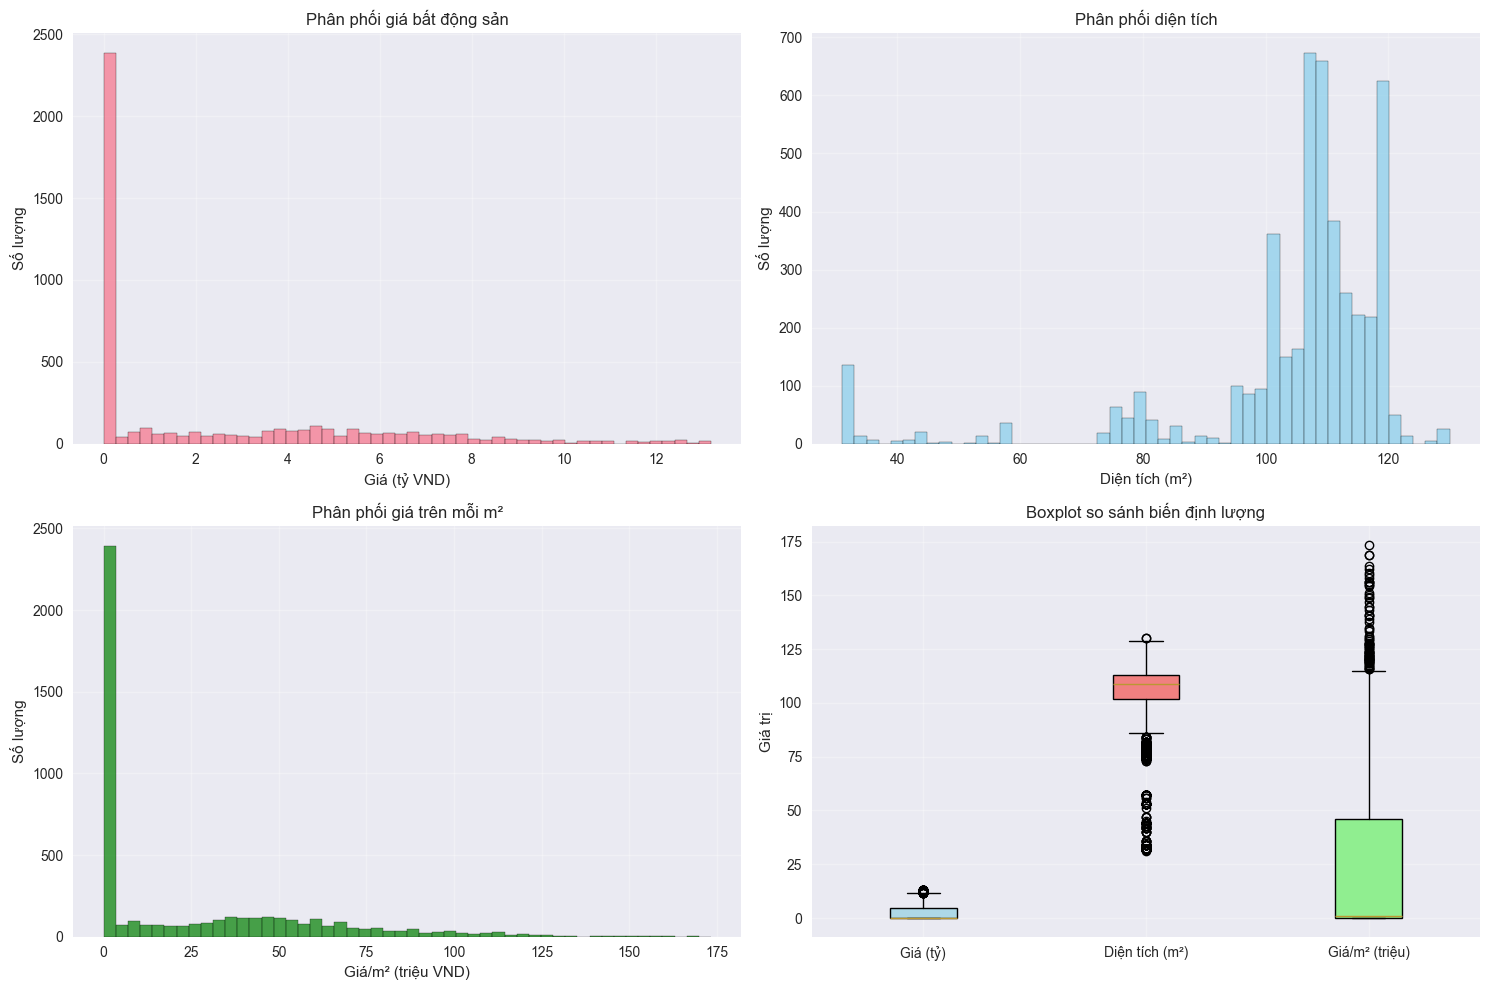

In [13]:
##  PH√ÇN T√çCH PH√ÇN PH·ªêI C√ÅC BI·∫æN CH√çNH

# %%
if len(df) > 0:
    # 1.1 Ph√¢n ph·ªëi gi√° b·∫•t ƒë·ªông s·∫£n
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Ph√¢n ph·ªëi gi√° (chuy·ªÉn ƒë·ªïi ƒë∆°n v·ªã tr∆∞·ªõc khi v·∫Ω)
    price_billion = df['Price_clean'] / 1e9
    axes[0,0].hist(price_billion, bins=50, alpha=0.7, edgecolor='black')
    axes[0,0].set_xlabel('Gi√° (t·ª∑ VND)')
    axes[0,0].set_ylabel('S·ªë l∆∞·ª£ng')
    axes[0,0].set_title('Ph√¢n ph·ªëi gi√° b·∫•t ƒë·ªông s·∫£n')
    axes[0,0].grid(True, alpha=0.3)

    # Ph√¢n ph·ªëi di·ªán t√≠ch
    axes[0,1].hist(df['Area_clean'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0,1].set_xlabel('Di·ªán t√≠ch (m¬≤)')
    axes[0,1].set_ylabel('S·ªë l∆∞·ª£ng')
    axes[0,1].set_title('Ph√¢n ph·ªëi di·ªán t√≠ch')
    axes[0,1].grid(True, alpha=0.3)

    # Ph√¢n ph·ªëi gi√°/m¬≤ (chuy·ªÉn ƒë·ªïi ƒë∆°n v·ªã)
    price_m2_million = df['Price_per_m2'] / 1e6
    axes[1,0].hist(price_m2_million, bins=50, alpha=0.7, edgecolor='black', color='green')
    axes[1,0].set_xlabel('Gi√°/m¬≤ (tri·ªáu VND)')
    axes[1,0].set_ylabel('S·ªë l∆∞·ª£ng')
    axes[1,0].set_title('Ph√¢n ph·ªëi gi√° tr√™n m·ªói m¬≤')
    axes[1,0].grid(True, alpha=0.3)

    # Boxplot so s√°nh (d·ªØ li·ªáu ƒë√£ chuy·ªÉn ƒë·ªïi)
    plot_data = [price_billion, df['Area_clean'], price_m2_million]
    labels = ['Gi√° (t·ª∑)', 'Di·ªán t√≠ch (m¬≤)', 'Gi√°/m¬≤ (tri·ªáu)']
    box_plot = axes[1,1].boxplot(plot_data, labels=labels, patch_artist=True)
    
    # T√¥ m√†u cho boxplot
    colors = ['lightblue', 'lightcoral', 'lightgreen']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[1,1].set_ylabel('Gi√° tr·ªã')
    axes[1,1].set_title('Boxplot so s√°nh bi·∫øn ƒë·ªãnh l∆∞·ª£ng')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [14]:
# %%
if len(df) > 0:
    # Th·ªëng k√™ m√¥ t·∫£ chi ti·∫øt
    print(" TH·ªêNG K√ä M√î T·∫¢ CHI TI·∫æT")

    def detailed_stats(series, name):
        print(f"\n--- {name} ---")
        print(f"Mean: {series.mean():,.0f}")
        print(f"Median: {series.median():,.0f}")
        print(f"Std: {series.std():,.0f}")
        print(f"Min: {series.min():,.0f}")
        print(f"Max: {series.max():,.0f}")
        print(f"Skewness: {series.skew():.3f} ({'L·ªách ph·∫£i' if series.skew() > 0 else 'L·ªách tr√°i' if series.skew() < 0 else 'ƒê·ªëi x·ª©ng'})")
        print(f"Kurtosis: {series.kurtosis():.3f}")

    detailed_stats(df['Price_clean'], "Gi√° b·∫•t ƒë·ªông s·∫£n (VND)")
    detailed_stats(df['Area_clean'], "Di·ªán t√≠ch (m¬≤)")
    detailed_stats(df['Price_per_m2'], "Gi√° tr√™n m¬≤ (VND/m¬≤)")

 TH·ªêNG K√ä M√î T·∫¢ CHI TI·∫æT

--- Gi√° b·∫•t ƒë·ªông s·∫£n (VND) ---
Mean: 2,465,795,376
Median: 100,000,000
Std: 3,266,693,959
Min: 100,000
Max: 13,200,000,000
Skewness: 1.190 (L·ªách ph·∫£i)
Kurtosis: 0.467

--- Di·ªán t√≠ch (m¬≤) ---
Mean: 104
Median: 109
Std: 18
Min: 31
Max: 130
Skewness: -2.546 (L·ªách tr√°i)
Kurtosis: 6.748

--- Gi√° tr√™n m¬≤ (VND/m¬≤) ---
Mean: 25,067,465
Median: 1,024,223
Std: 33,305,447
Min: 926
Max: 173,333,333
Skewness: 1.295 (L·ªách ph·∫£i)
Kurtosis: 1.071


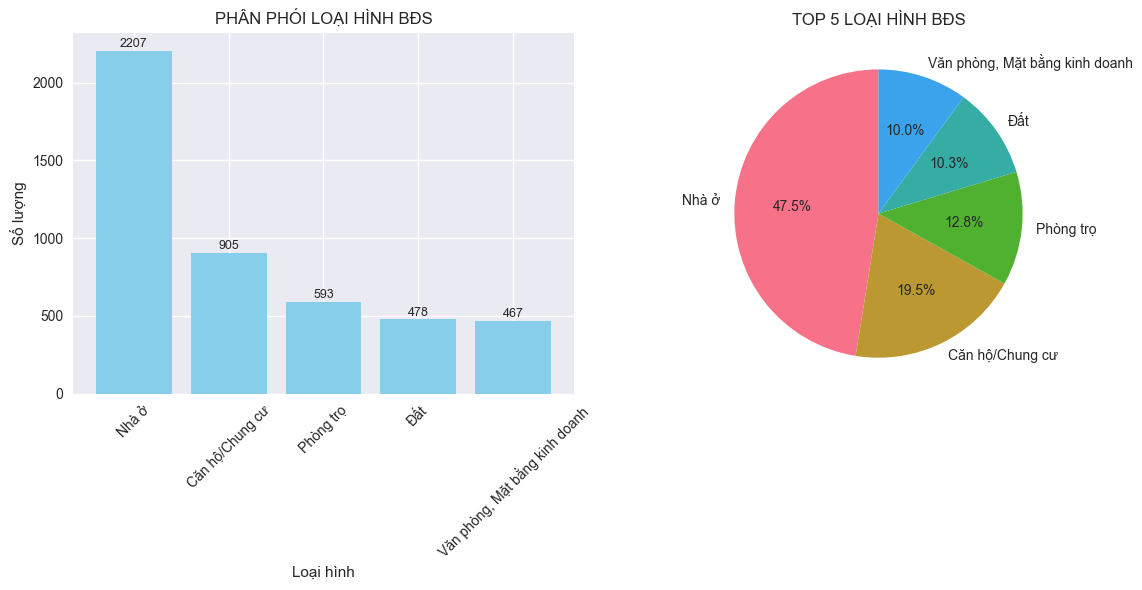

 GI√Å TRUNG B√åNH THEO LO·∫†I H√åNH BƒêS
                                Count    Price_Mean  Price_Median  Area_Mean  \
Category                                                                       
Nh√† ·ªü                            2207  3.863093e+09  3.800000e+09      105.0   
CƒÉn h·ªô/Chung c∆∞                   905  1.105490e+09  1.100000e+07      106.0   
Ph√≤ng tr·ªç                         593  3.501003e+06  3.400000e+06      107.0   
ƒê·∫•t                               478  3.979663e+09  3.700000e+09       93.0   
VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh    467  7.554481e+07  3.000000e+07      106.0   

                                Price_m2_Mean  
Category                                       
Nh√† ·ªü                              38469357.0  
CƒÉn h·ªô/Chung c∆∞                    11190924.0  
Ph√≤ng tr·ªç                             32933.0  
ƒê·∫•t                                44316686.0  
VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh       709099.0  


In [15]:
##  PH√ÇN T√çCH THEO LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N

# %%
if len(df) > 0 and 'Category' in df.columns:
    # 2.1 Ph√¢n ph·ªëi lo·∫°i h√¨nh BƒêS
    plt.figure(figsize=(12, 6))
    prop_type_counts = df['Category'].value_counts()
    
    # Bi·ªÉu ƒë·ªì c·ªôt
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(prop_type_counts.head(10))), prop_type_counts.head(10).values, color='skyblue')
    plt.title('PH√ÇN PH·ªêI LO·∫†I H√åNH BƒêS')
    plt.xlabel('Lo·∫°i h√¨nh')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks(range(len(prop_type_counts.head(10))), prop_type_counts.head(10).index, rotation=45)
    
    # Th√™m s·ªë li·ªáu tr√™n ƒë·∫ßu c·ªôt
    for bar, count in zip(bars, prop_type_counts.head(10).values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{count}', 
                ha='center', va='bottom', fontsize=9)
    
    # Bi·ªÉu ƒë·ªì tr√≤n
    plt.subplot(1, 2, 2)
    top_5 = prop_type_counts.head(5)
    plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%', startangle=90)
    plt.title('TOP 5 LO·∫†I H√åNH BƒêS')
    
    plt.tight_layout()
    plt.show()

    # 2.2 Gi√° trung b√¨nh theo lo·∫°i h√¨nh
    price_by_type = df.groupby('Category').agg({
        'Price_clean': ['count', 'mean', 'median'],
        'Area_clean': 'mean',
        'Price_per_m2': 'mean'
    }).round(0)
    
    price_by_type.columns = ['Count', 'Price_Mean', 'Price_Median', 'Area_Mean', 'Price_m2_Mean']
    price_by_type = price_by_type.sort_values('Count', ascending=False)
    
    print(" GI√Å TRUNG B√åNH THEO LO·∫†I H√åNH BƒêS")
    print(price_by_type.head(10))

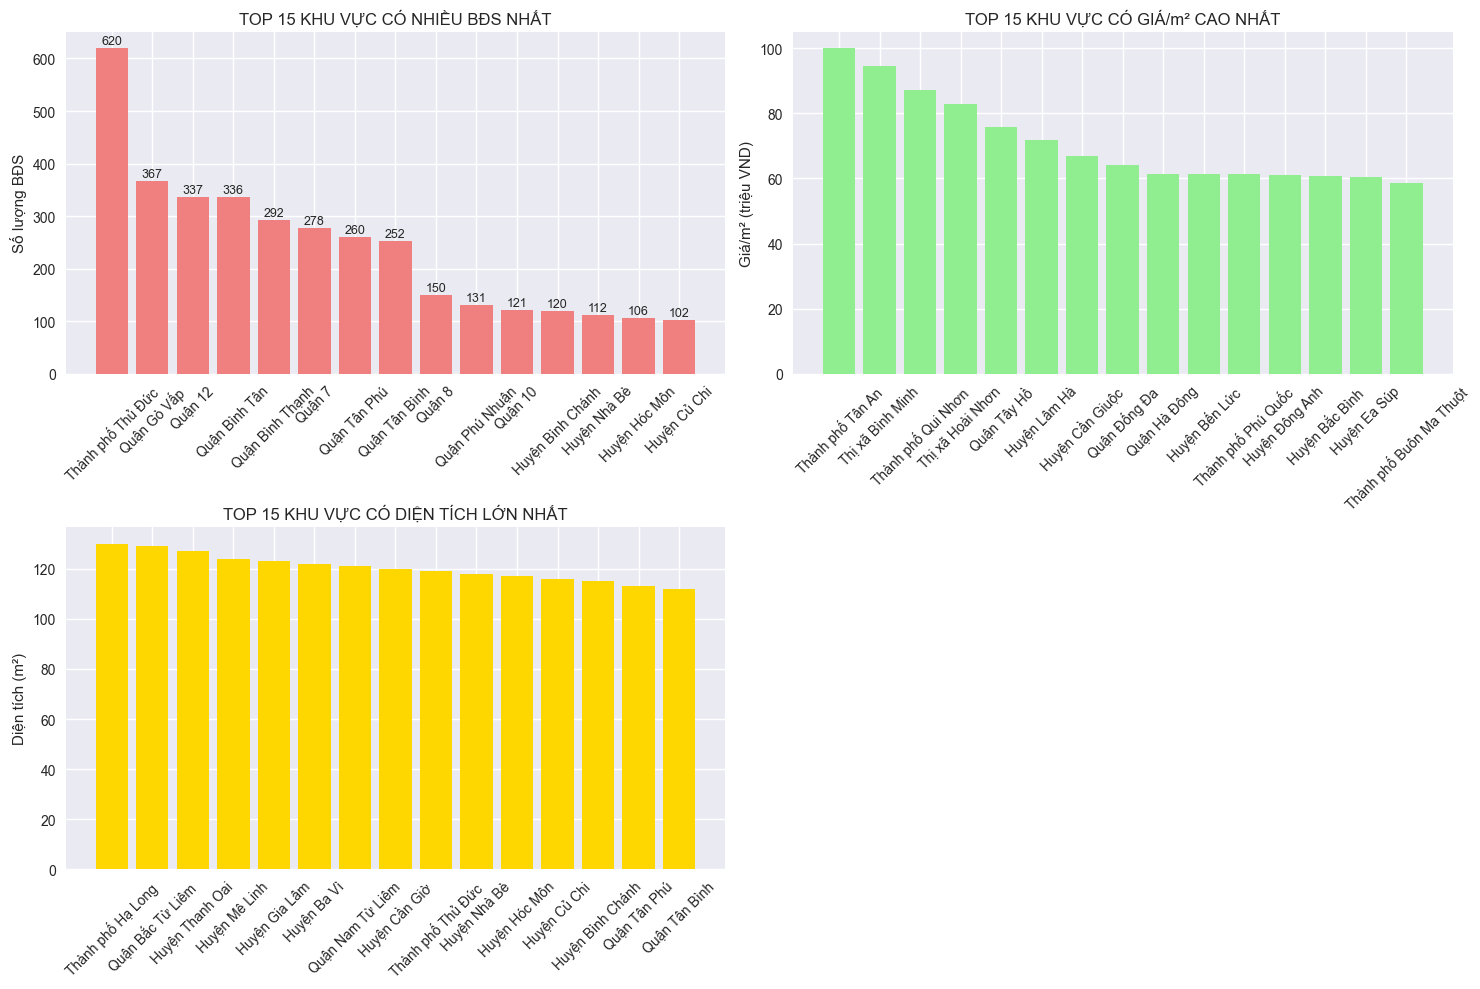

In [16]:
##  PH√ÇN T√çCH THEO V·ªä TR√ç ƒê·ªäA L√ù

# %%
if len(df) > 0 and 'District' in df.columns:
    # 3.1 Ph√¢n t√≠ch theo KHU V·ª∞C
    plt.figure(figsize=(15, 10))
    
    # Top qu·∫≠n c√≥ nhi·ªÅu BƒêS nh·∫•t
    district_counts = df['District'].value_counts().head(15)
    
    plt.subplot(2, 2, 1)
    bars1 = plt.bar(range(len(district_counts)), district_counts.values, color='lightcoral')
    plt.title('TOP 15 KHU V·ª∞C C√ì NHI·ªÄU BƒêS NH·∫§T')
    plt.xticks(range(len(district_counts)), district_counts.index, rotation=45)
    plt.ylabel('S·ªë l∆∞·ª£ng BƒêS')
    
    # Th√™m s·ªë li·ªáu tr√™n c·ªôt
    for bar, count in zip(bars1, district_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{count}', 
                ha='center', va='bottom', fontsize=9)
    
    # Gi√° trung b√¨nh theo qu·∫≠n
    plt.subplot(2, 2, 2)
    district_price = df.groupby('District')['Price_per_m2'].mean().sort_values(ascending=False).head(15)
    bars2 = plt.bar(range(len(district_price)), district_price.values / 1e6, color='lightgreen')
    plt.title('TOP 15 KHU V·ª∞C C√ì GI√Å/m¬≤ CAO NH·∫§T')
    plt.xticks(range(len(district_price)), district_price.index, rotation=45)
    plt.ylabel('Gi√°/m¬≤ (tri·ªáu VND)')
    
    # Di·ªán t√≠ch trung b√¨nh theo qu·∫≠n
    plt.subplot(2, 2, 3)
    district_area = df.groupby('District')['Area_clean'].mean().sort_values(ascending=False).head(15)
    bars3 = plt.bar(range(len(district_area)), district_area.values, color='gold')
    plt.title('TOP 15 KHU V·ª∞C C√ì DI·ªÜN T√çCH L·ªöN NH·∫§T')
    plt.xticks(range(len(district_area)), district_area.index, rotation=45)
    plt.ylabel('Di·ªán t√≠ch (m¬≤)')
    
    
    plt.tight_layout()
    plt.show()

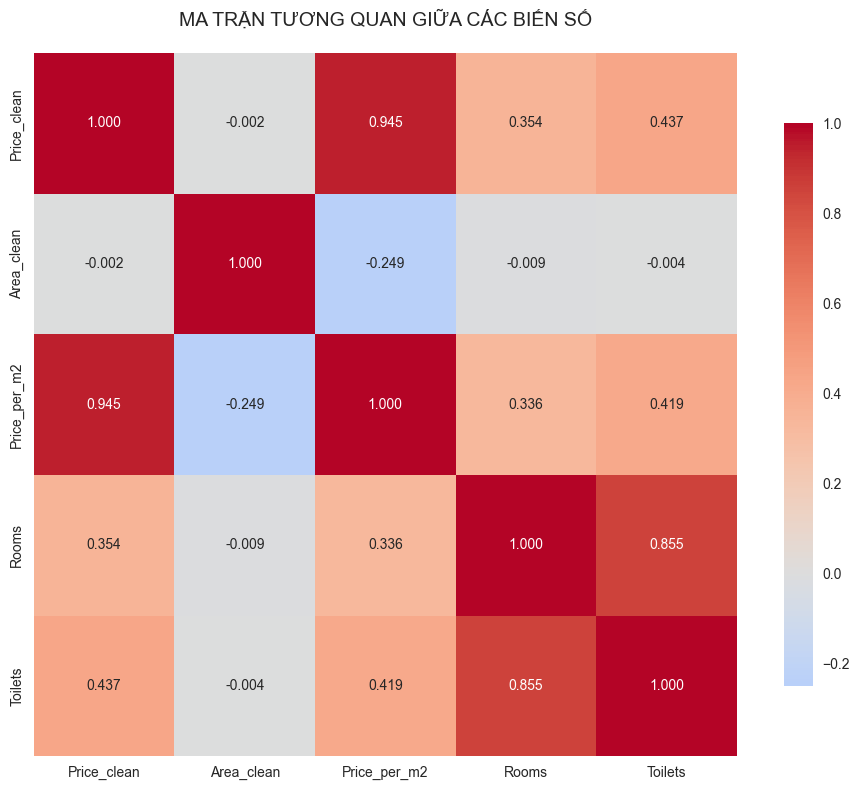

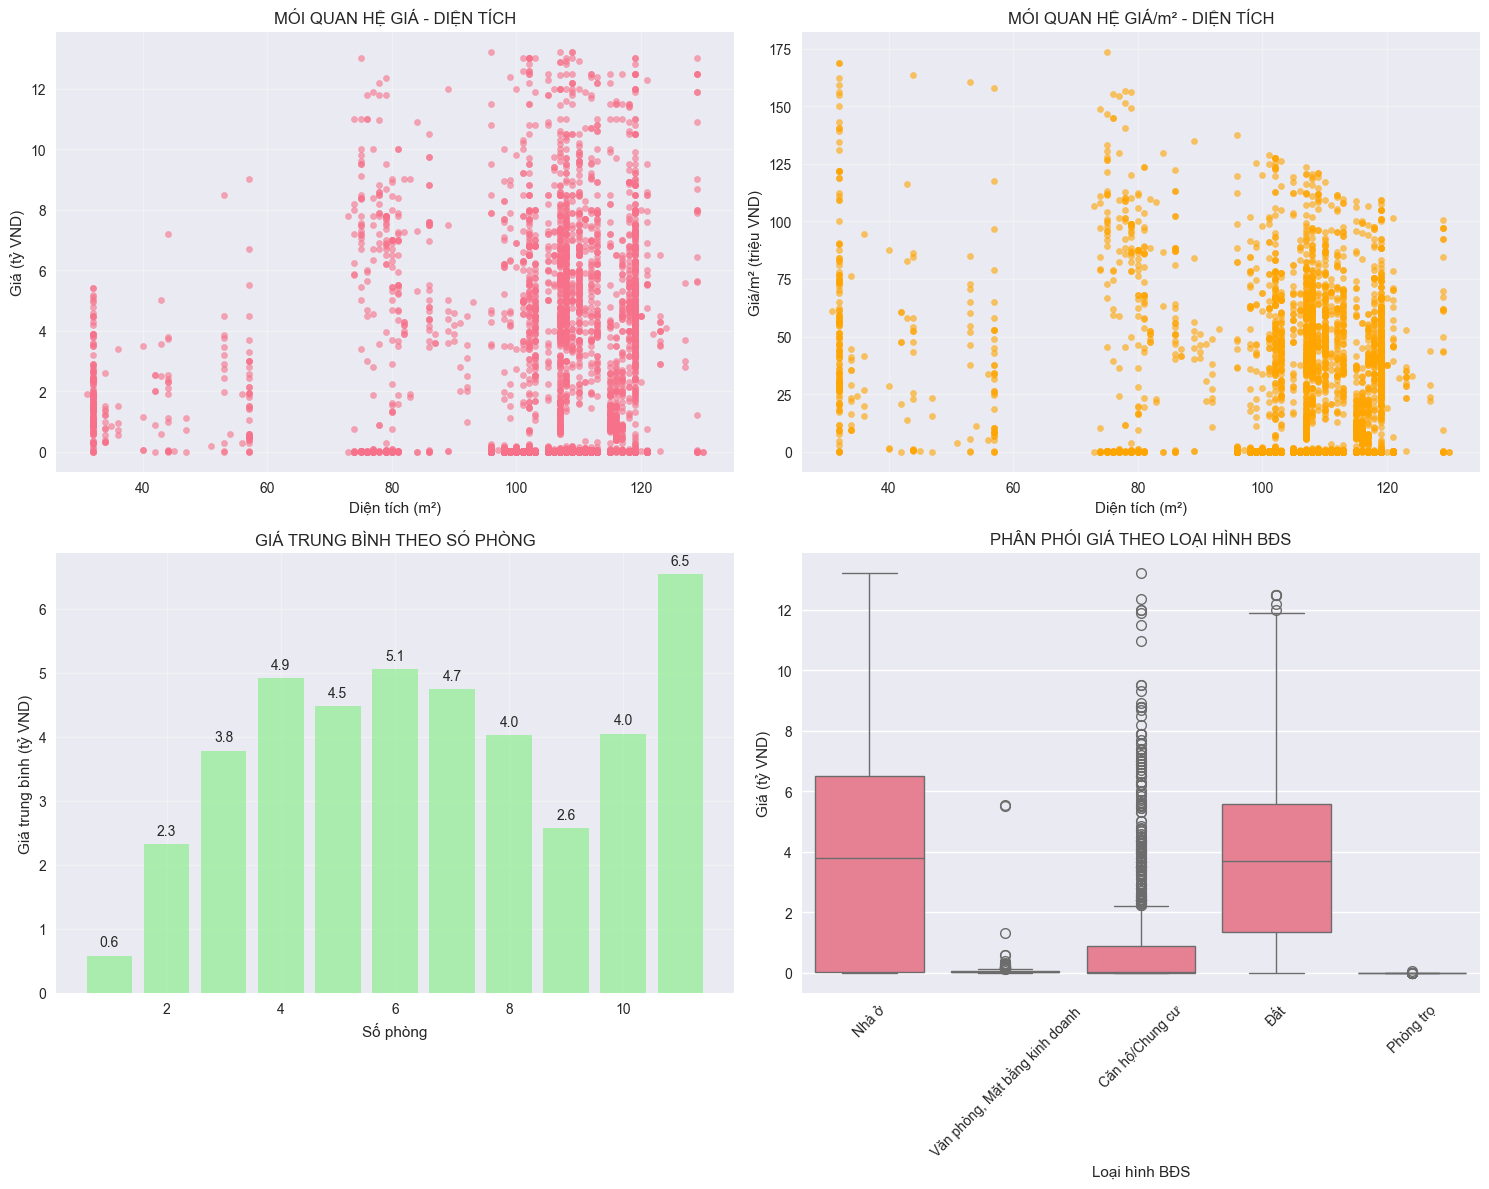

In [17]:
##  PH√ÇN T√çCH M·ªêI QUAN H·ªÜ GI·ªÆA C√ÅC BI·∫æN

# %%
if len(df) > 0:
    # 4.1 Ma tr·∫≠n t∆∞∆°ng quan
    numeric_cols = ['Price_clean', 'Area_clean', 'Price_per_m2']
    if 'Rooms' in df.columns:
        numeric_cols.append('Rooms')
    if 'Toilets' in df.columns:
        numeric_cols.append('Toilets')

    # Ch·ªâ l·∫•y c√°c c·ªôt t·ªìn t·∫°i
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()

        # Heatmap t∆∞∆°ng quan
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                    square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
        plt.title('MA TR·∫¨N T∆Ø∆†NG QUAN GI·ªÆA C√ÅC BI·∫æN S·ªê', fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()

        # 4.2 Ph√¢n t√≠ch chi ti·∫øt t·ª´ng m·ªëi quan h·ªá
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Gi√° vs Di·ªán t√≠ch
        axes[0,0].scatter(df['Area_clean'], df['Price_clean']/1e9, alpha=0.6, s=20)
        axes[0,0].set_xlabel('Di·ªán t√≠ch (m¬≤)')
        axes[0,0].set_ylabel('Gi√° (t·ª∑ VND)')
        axes[0,0].set_title('M·ªêI QUAN H·ªÜ GI√Å - DI·ªÜN T√çCH')
        axes[0,0].grid(True, alpha=0.3)

        # Gi√°/m¬≤ vs Di·ªán t√≠ch
        axes[0,1].scatter(df['Area_clean'], df['Price_per_m2']/1e6, alpha=0.6, s=20, color='orange')
        axes[0,1].set_xlabel('Di·ªán t√≠ch (m¬≤)')
        axes[0,1].set_ylabel('Gi√°/m¬≤ (tri·ªáu VND)')
        axes[0,1].set_title('M·ªêI QUAN H·ªÜ GI√Å/m¬≤ - DI·ªÜN T√çCH')
        axes[0,1].grid(True, alpha=0.3)

        # Gi√° vs S·ªë ph√≤ng (Rooms) n·∫øu c√≥
        if 'Rooms' in df.columns:
            room_price = df.groupby('Rooms')['Price_clean'].mean() / 1e9
            axes[1,0].bar(room_price.index, room_price.values, color='lightgreen', alpha=0.7)
            axes[1,0].set_xlabel('S·ªë ph√≤ng')
            axes[1,0].set_ylabel('Gi√° trung b√¨nh (t·ª∑ VND)')
            axes[1,0].set_title('GI√Å TRUNG B√åNH THEO S·ªê PH√íNG')
            axes[1,0].grid(True, alpha=0.3)
            
            for i, v in enumerate(room_price.values):
                axes[1,0].text(room_price.index[i], v + 0.1, f'{v:.1f}', ha='center', va='bottom')

        # Ph√¢n ph·ªëi gi√° theo Category (thay cho Property Type)
        if 'Category' in df.columns:
            plot_data = df.copy()
            plot_data['Price_billion'] = plot_data['Price_clean'] / 1e9
            
            top_categories = df['Category'].value_counts().head(5).index
            cat_data = plot_data[plot_data['Category'].isin(top_categories)]
            
            sns.boxplot(data=cat_data, x='Category', y='Price_billion', ax=axes[1,1])
            axes[1,1].set_xlabel('Lo·∫°i h√¨nh BƒêS')
            axes[1,1].set_ylabel('Gi√° (t·ª∑ VND)')
            axes[1,1].set_title('PH√ÇN PH·ªêI GI√Å THEO LO·∫†I H√åNH BƒêS')
            axes[1,1].tick_params(axis='x', rotation=45)

        # ·∫®n subplot kh√¥ng s·ª≠ d·ª•ng
        for i in range(2):
            for j in range(2):
                if not axes[i,j].has_data():
                    axes[i,j].set_visible(False)

        plt.tight_layout()
        plt.show()

In [18]:
## PH√ÇN T√çCH THEO TH·ªúI GIAN (N·∫æU C√ì)

# %%
if len(df) > 0:
    # 5.1 Ki·ªÉm tra n·∫øu c√≥ c·ªôt ng√†y th√°ng
    date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]

    if date_columns:
        print(f"üìÖ Ph√°t hi·ªán c·ªôt th·ªùi gian: {date_columns}")
    else:
        print("‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y c·ªôt th·ªùi gian trong dataset")

üìÖ Ph√°t hi·ªán c·ªôt th·ªùi gian: ['Date_Posted', 'Crawl_Date']


üîç PH√ÇN T√çCH T·ª™ KH√ìA TRONG TI√äU ƒê·ªÄ
ch√≠nh_ch·ªß      :  258 BƒêS (5.5%)
gi√°_r·∫ª         :  112 BƒêS (2.4%)
view_ƒë·∫πp       :    9 BƒêS (0.2%)
m·∫∑t_ti·ªÅn       :  533 BƒêS (11.5%)
s·ªï_ƒë·ªè          :   11 BƒêS (0.2%)
s·ªï_h·ªìng        :   75 BƒêS (1.6%)


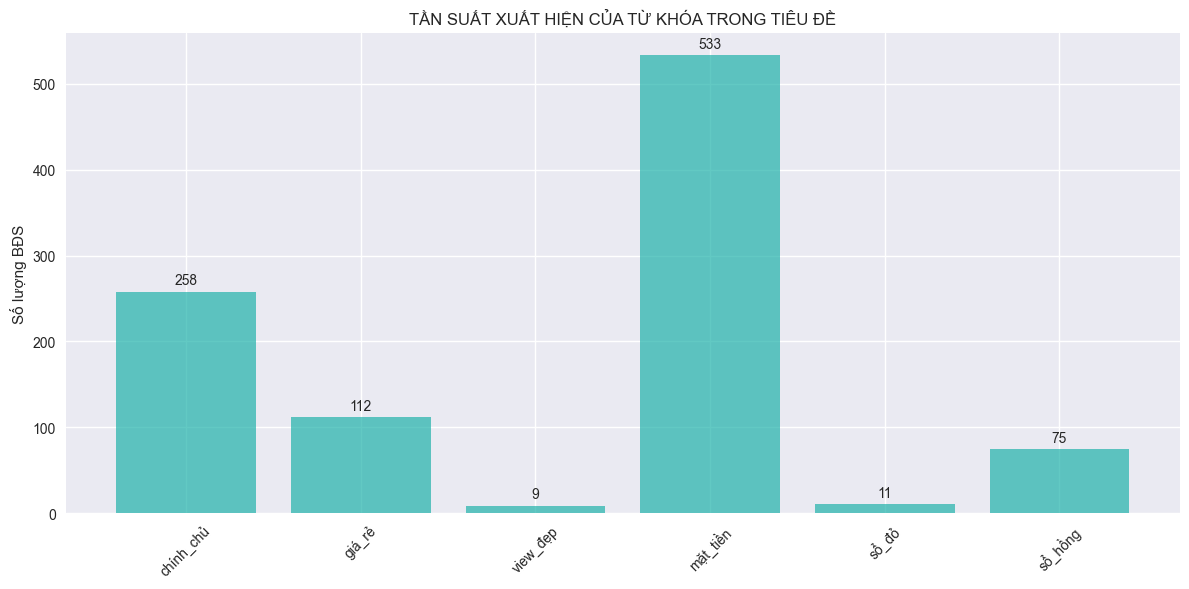

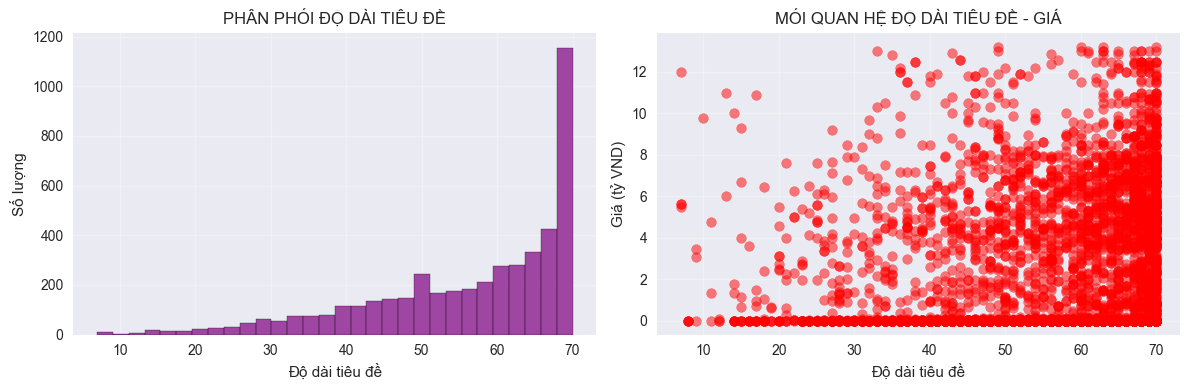

In [19]:
## PH√ÇN T√çCH C√ÅC BI·∫æN PH·ª§ TR·ª¢

# %%
if len(df) > 0:
    # 6.1 Ph√¢n t√≠ch t·ª´ kh√≥a trong ti√™u ƒë·ªÅ
    keyword_cols = [col for col in df.columns if 'Keyword' in col]

    if keyword_cols:
        print("üîç PH√ÇN T√çCH T·ª™ KH√ìA TRONG TI√äU ƒê·ªÄ")
        
        plt.figure(figsize=(12, 6))
        keyword_stats = {}
        
        for keyword_col in keyword_cols:
            count = df[keyword_col].sum()
            percentage = (count / len(df)) * 100
            keyword_name = keyword_col.replace('Keyword_', '')
            keyword_stats[keyword_name] = count
            print(f"{keyword_name:<15}: {count:>4} BƒêS ({percentage:.1f}%)")
        
        # Bi·ªÉu ƒë·ªì t·ª´ kh√≥a
        plt.bar(keyword_stats.keys(), keyword_stats.values(), color='lightseagreen', alpha=0.7)
        plt.title('T·∫¶N SU·∫§T XU·∫§T HI·ªÜN C·ª¶A T·ª™ KH√ìA TRONG TI√äU ƒê·ªÄ')
        plt.xticks(rotation=45)
        plt.ylabel('S·ªë l∆∞·ª£ng BƒêS')
        
        # Th√™m s·ªë li·ªáu tr√™n c·ªôt
        for i, v in enumerate(keyword_stats.values()):
            plt.text(i, v + 5, f'{v}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

    # 6.2 Ph√¢n t√≠ch ƒë·ªô d√†i ti√™u ƒë·ªÅ
    if 'Title_Length' in df.columns:
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.hist(df['Title_Length'], bins=30, alpha=0.7, edgecolor='black', color='purple')
        plt.xlabel('ƒê·ªô d√†i ti√™u ƒë·ªÅ')
        plt.ylabel('S·ªë l∆∞·ª£ng')
        plt.title('PH√ÇN PH·ªêI ƒê·ªò D√ÄI TI√äU ƒê·ªÄ')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.scatter(df['Title_Length'], df['Price_clean']/1e9, alpha=0.5, color='red')
        plt.xlabel('ƒê·ªô d√†i ti√™u ƒë·ªÅ')
        plt.ylabel('Gi√° (t·ª∑ VND)')
        plt.title('M·ªêI QUAN H·ªÜ ƒê·ªò D√ÄI TI√äU ƒê·ªÄ - GI√Å')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

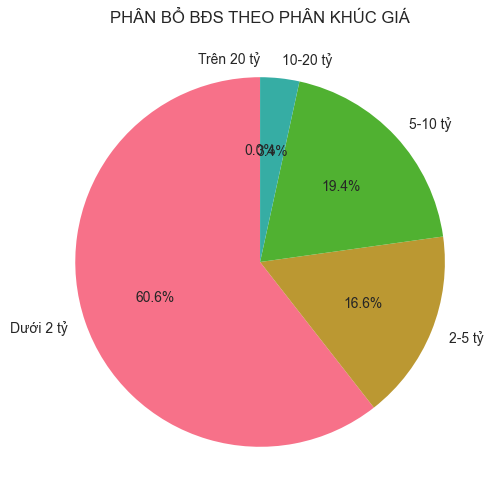

üìä PH√ÇN KH√öC GI√Å TH·ªä TR∆Ø·ªúNG:
D∆∞·ªõi 2 t·ª∑   : 2816 BƒêS (60.6%)
2-5 t·ª∑      :  774 BƒêS (16.6%)
5-10 t·ª∑     :  901 BƒêS (19.4%)
10-20 t·ª∑    :  159 BƒêS (3.4%)
Tr√™n 20 t·ª∑  :    0 BƒêS (0.0%)

üìä PH√ÇN KH√öC DI·ªÜN T√çCH:
D∆∞·ªõi 50m¬≤   :  189 BƒêS (4.1%)
50-80m¬≤     :  229 BƒêS (4.9%)
80-120m¬≤    : 4134 BƒêS (88.9%)
120-200m¬≤   :   98 BƒêS (2.1%)
Tr√™n 200m¬≤  :    0 BƒêS (0.0%)


In [20]:
##  PH√ÇN T√çCH NGO·∫†I L·ªÜ V√Ä C·ª§M GI√Å TR·ªä

# %%
if len(df) > 0:
    # 7.1 Ph√¢n t√≠ch c√°c segment gi√°
    def create_price_segments(price_series):
        segments = {
            'D∆∞·ªõi 2 t·ª∑': (0, 2e9),
            '2-5 t·ª∑': (2e9, 5e9),
            '5-10 t·ª∑': (5e9, 10e9),
            '10-20 t·ª∑': (10e9, 20e9),
            'Tr√™n 20 t·ª∑': (20e9, float('inf'))
        }
        
        segment_counts = {}
        for segment, (low, high) in segments.items():
            count = ((price_series >= low) & (price_series < high)).sum()
            segment_counts[segment] = count
        
        return segment_counts

    price_segments = create_price_segments(df['Price_clean'])

    plt.figure(figsize=(10, 6))
    plt.pie(price_segments.values(), labels=price_segments.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('PH√ÇN B·ªî BƒêS THEO PH√ÇN KH√öC GI√Å')
    plt.show()

    print("üìä PH√ÇN KH√öC GI√Å TH·ªä TR∆Ø·ªúNG:")
    for segment, count in price_segments.items():
        percentage = (count / len(df)) * 100
        print(f"{segment:<12}: {count:>4} BƒêS ({percentage:.1f}%)")

    # 7.2 Ph√¢n t√≠ch c√°c segment di·ªán t√≠ch
    def create_area_segments(area_series):
        segments = {
            'D∆∞·ªõi 50m¬≤': (0, 50),
            '50-80m¬≤': (50, 80),
            '80-120m¬≤': (80, 120),
            '120-200m¬≤': (120, 200),
            'Tr√™n 200m¬≤': (200, float('inf'))
        }
        
        segment_counts = {}
        for segment, (low, high) in segments.items():
            count = ((area_series >= low) & (area_series < high)).sum()
            segment_counts[segment] = count
        
        return segment_counts

    area_segments = create_area_segments(df['Area_clean'])

    print("\nüìä PH√ÇN KH√öC DI·ªÜN T√çCH:")
    for segment, count in area_segments.items():
        percentage = (count / len(df)) * 100
        print(f"{segment:<12}: {count:>4} BƒêS ({percentage:.1f}%)")

In [21]:
## K·∫æT LU·∫¨N EDA T·ªîNG QUAN

# %%
if len(df) > 0:
    print(" K·∫æT LU·∫¨N EDA T·ªîNG QUAN")
    print("=" * 50)

    # Th·ªëng k√™ t·ªïng quan
    print(f"‚Ä¢ T·ªïng s·ªë BƒêS ph√¢n t√≠ch: {len(df):,}")
    print(f"‚Ä¢ Gi√° trung b√¨nh: {df['Price_clean'].mean()/1e9:.1f} t·ª∑ VND")
    print(f"‚Ä¢ Di·ªán t√≠ch trung b√¨nh: {df['Area_clean'].mean():.0f} m¬≤")
    print(f"‚Ä¢ Gi√°/m¬≤ trung b√¨nh: {df['Price_per_m2'].mean()/1e6:.1f} tri·ªáu VND/m¬≤")

    # Ph√¢n t√≠ch ƒë·ªô bi·∫øn ƒë·ªông
    price_cv = (df['Price_clean'].std() / df['Price_clean'].mean()) * 100
    area_cv = (df['Area_clean'].std() / df['Area_clean'].mean()) * 100

    print(f"‚Ä¢ ƒê·ªô bi·∫øn ƒë·ªông gi√°: {price_cv:.1f}%")
    print(f"‚Ä¢ ƒê·ªô bi·∫øn ƒë·ªông di·ªán t√≠ch: {area_cv:.1f}%")

    # Ph√¢n t√≠ch t∆∞∆°ng quan
    if 'Area_clean' in df.columns and 'Price_clean' in df.columns:
        correlation = df['Area_clean'].corr(df['Price_clean'])
        print(f"‚Ä¢ T∆∞∆°ng quan Di·ªán t√≠ch-Gi√°: {correlation:.3f}")

    # L∆∞u k·∫øt qu·∫£ EDA
    eda_summary = {
        'total_properties': len(df),
        'avg_price': df['Price_clean'].mean(),
        'avg_area': df['Area_clean'].mean(),
        'avg_price_per_m2': df['Price_per_m2'].mean(),
        'price_std': df['Price_clean'].std(),
        'area_std': df['Area_clean'].std()
    }

    print(" HO√ÄN T·∫§T PH√ÇN T√çCH EDA!")
else:
    print(" KH√îNG TH·ªÇ TH·ª∞C HI·ªÜN EDA DO THI·∫æU D·ªÆ LI·ªÜU")


 K·∫æT LU·∫¨N EDA T·ªîNG QUAN
‚Ä¢ T·ªïng s·ªë BƒêS ph√¢n t√≠ch: 4,650
‚Ä¢ Gi√° trung b√¨nh: 2.5 t·ª∑ VND
‚Ä¢ Di·ªán t√≠ch trung b√¨nh: 104 m¬≤
‚Ä¢ Gi√°/m¬≤ trung b√¨nh: 25.1 tri·ªáu VND/m¬≤
‚Ä¢ ƒê·ªô bi·∫øn ƒë·ªông gi√°: 132.5%
‚Ä¢ ƒê·ªô bi·∫øn ƒë·ªông di·ªán t√≠ch: 17.6%
‚Ä¢ T∆∞∆°ng quan Di·ªán t√≠ch-Gi√°: -0.002
 HO√ÄN T·∫§T PH√ÇN T√çCH EDA!
